# <center>INF569(MACHINE LEARNING 2) INSTITUT POLYTECHNIQUE DE PARIS 31 MARCH 2020</center>#
# <center>COURS MAP569</center>#
# <center>HOUSE PRICES : ADVANCED REGRESSION TECHNIQUESouse Prices</center>#
## <center>PANONGBENE JEAN MOHAMED SAWADOGO</center>#

In [39]:
import csv
import marshal
import numpy as np
import pandas as pd
import tensorflow as tf
import networkx as nwx
from sklearn import svm
from sklearn.svm import SVC
from datetime import datetime
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

## I USE THIS FUNCTION TO DETERMINATE THE EXECUTION TIME

In [2]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## TO USE THIS FUNCTION TO SAVE THE TARGET RESULT

1-- This function take a list of of value(liste_to_save) and the string(file_name) and create a file named "file_name.csv" containing our values

In [3]:
#this function allow to save a list data in a csv file
def save_liste(liste_to_save,file_name):    
    size_liste=len(liste_to_save)
    file_name=file_name+".csv"
    
    with open(file_name, "w") as f_write:
        writer = csv.writer(f_write, delimiter=",")
        writer.writerow(("id","predicted"))

        for i in range(size_liste):
            writer.writerow((i+1,int(liste_to_save[i])))

## IMPORTING DATA 

In [4]:
#load the data
train_data=pd.read_csv("DATA/CreditTraining.csv")

## TO SEE THE CHARACTERISTICS OF OUR DATA

1- Here we display a summary of the characteristics of our data

In [5]:
#to see the statistique of the data
print(train_data.describe(include="all"))

        Id_Customer            Y        Customer_Type   BirthDate  \
count   5380.000000  5380.000000                 5380        5380   
unique          NaN          NaN                    2        4382   
top             NaN          NaN  Non Existing Client  01/01/1973   
freq            NaN          NaN                 3369           7   
mean    4784.535688     0.073048                  NaN         NaN   
std     2781.436262     0.260240                  NaN         NaN   
min        1.000000     0.000000                  NaN         NaN   
25%     2368.500000     0.000000                  NaN         NaN   
50%     4762.500000     0.000000                  NaN         NaN   
75%     7180.250000     0.000000                  NaN         NaN   
max     9605.000000     1.000000                  NaN         NaN   

       Customer_Open_Date   P_Client Educational_Level Marital_Status  \
count                5380       5380              5380           5380   
unique               1244

## TO DETERMINATE THE MISSING VALUES
1-- We use the isnull function to determine the missing values in the columns

2-- In the Prod_closed Date column, there are a lot of missing values and we plan to delete it so we did not consider it necessary to do an isnull with this column

In [6]:
print(train_data[train_data["Id_Customer"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [7]:
print(train_data[train_data["Y"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [8]:
print(train_data[train_data["Customer_Type"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [9]:
print(train_data[train_data["BirthDate"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [10]:
print(train_data[train_data["Customer_Open_Date"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [11]:
print(train_data[train_data["P_Client"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [12]:
print(train_data[train_data["Educational_Level"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [13]:
print(train_data[train_data["Marital_Status"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [14]:
print(train_data[train_data["Number_Of_Dependant"].isnull()])

      Id_Customer  Y    Customer_Type   BirthDate Customer_Open_Date  \
634          8953  1  Existing Client  07/06/1990         20/09/2010   
5045         9588  0  Existing Client  05/07/1950         18/09/2004   

       P_Client Educational_Level Marital_Status  Number_Of_Dependant  \
634    P_Client        University         Single                  NaN   
5045  NP_Client        Master/PhD        Married                  NaN   

      Years_At_Residence Net_Annual_Income  Years_At_Business  \
634                   21              33,6                1.0   
5045                  10                50               10.0   

     Prod_Sub_Category Prod_Decision_Date  Source Type_Of_Residence  \
634                  C         18/04/2012  Branch             Owned   
5045                 C         26/04/2012   Sales             Owned   

      Nb_Of_Products Prod_Closed_Date Prod_Category  
634                2       31/03/2013             G  
5045               1              NaN        

NOTE : Here, we observe that we have two missing values in Number_Of_Dependant which concerns the clients of Id_Customer 8953 and 9588

In [15]:
print(train_data[train_data["Years_At_Residence"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [16]:
print(train_data[train_data["Net_Annual_Income"].isnull()])

      Id_Customer  Y        Customer_Type   BirthDate Customer_Open_Date  \
1879         9399  0  Non Existing Client  16/04/1968         17/04/2012   
5144         9555  0  Non Existing Client  15/01/1951         23/04/2012   

       P_Client Educational_Level Marital_Status  Number_Of_Dependant  \
1879  NP_Client        University        Married                  0.0   
5144  NP_Client        University        Married                  0.0   

      Years_At_Residence Net_Annual_Income  Years_At_Business  \
1879                  10               NaN               10.0   
5144                  11               NaN                0.0   

     Prod_Sub_Category Prod_Decision_Date  Source Type_Of_Residence  \
1879                 C         18/04/2012   Sales             Owned   
5144                 C         26/04/2012  Branch          Old rent   

      Nb_Of_Products Prod_Closed_Date Prod_Category  
1879               1       23/12/2012             B  
5144               2       20/01/

NOTE : Here, we observe that we have two missing values in Net_Annual_Income which concerns the clients of Id_Customer 9399 and 9555

In [17]:
print(train_data[train_data["Years_At_Business"].isnull()])

      Id_Customer  Y        Customer_Type   BirthDate Customer_Open_Date  \
1987          398  0  Non Existing Client  14/05/1984         19/05/2011   
2750         5882  0  Non Existing Client  08/08/1981         14/12/2011   

       P_Client Educational_Level Marital_Status  Number_Of_Dependant  \
1987  NP_Client        Master/PhD         Single                  0.0   
2750  NP_Client        University        Married                  0.0   

      Years_At_Residence Net_Annual_Income  Years_At_Business  \
1987                  10                25                NaN   
2750                   2               108                NaN   

     Prod_Sub_Category Prod_Decision_Date  Source Type_Of_Residence  \
1987                 C         26/05/2011  Branch             Owned   
2750                 C         27/12/2011  Branch             Owned   

      Nb_Of_Products Prod_Closed_Date Prod_Category  
1987               2       16/10/2012             D  
2750               1             

NOTE : Here, we observe that we have two missing values in Number_Of_Dependant which concerns the clients of Id_Customer 398 and 5882

In [18]:
print(train_data[train_data["Prod_Sub_Category"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [19]:
print(train_data[train_data["Prod_Decision_Date"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [20]:
print(train_data[train_data["Source"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [21]:
print(train_data[train_data["Type_Of_Residence"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [22]:
print(train_data[train_data["Nb_Of_Products"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


In [23]:
print(train_data[train_data["Prod_Category"].isnull()])

Empty DataFrame
Columns: [Id_Customer, Y, Customer_Type, BirthDate, Customer_Open_Date, P_Client, Educational_Level, Marital_Status, Number_Of_Dependant, Years_At_Residence, Net_Annual_Income, Years_At_Business, Prod_Sub_Category, Prod_Decision_Date, Source, Type_Of_Residence, Nb_Of_Products, Prod_Closed_Date, Prod_Category]
Index: []


## FOR VISUALISATION THE CATEGORICIAL VARIABLE
1--  these functions are used to determine the values ​​that quanlitative variables can take and to determine their proportions in the data

In [24]:
display(train_data.Customer_Type.value_counts())

Non Existing Client    3369
Existing Client        2011
Name: Customer_Type, dtype: int64

In [25]:
display(train_data.P_Client.value_counts())

NP_Client    4968
P_Client      412
Name: P_Client, dtype: int64

In [26]:
display(train_data.Educational_Level.value_counts())

University           4785
Master/PhD            522
Diploma                58
Secondary or Less      15
Name: Educational_Level, dtype: int64

In [27]:
display(train_data.Marital_Status.value_counts())

Married      4206
Single       1046
Widowed        64
Divorced       63
Separated       1
Name: Marital_Status, dtype: int64

In [28]:
display(train_data.Prod_Sub_Category.value_counts())

C    4638
G     624
P     118
Name: Prod_Sub_Category, dtype: int64

In [29]:
display(train_data.Source.value_counts())

Sales     4119
Branch    1261
Name: Source, dtype: int64

In [30]:
display(train_data.Type_Of_Residence.value_counts())

Owned       4791
Old rent     323
Parents      179
New rent      83
Company        4
Name: Type_Of_Residence, dtype: int64

In [31]:
display(train_data.Prod_Category.value_counts())

B    3176
D     670
C     517
K     265
L     236
G     188
E     101
H      79
J      71
M      49
A      19
F       5
I       4
Name: Prod_Category, dtype: int64

# <center> PREPROCESSING DATA  </center>#

1-- This function takes as argument a pandas dataframe containing our data in csv file and does the necessary preprocessing by returning an array numpy and a label which will be used by our classification algorithms. To do this function, do the following processing.

2-- The first thing we do is delete the Prod_Closed_date column because this column has a lot of missing data and therefore no method of replacing missing data can be effective on this column.

3-- As we have just two missing data in the Number_Of_dependance column, we preferred not to delete the two rows presenting the missing data by preferring to replace the missing data with the value 0 which is a value present in the column chosen at random.

4-- We used the same principle for missing data in the other columns (Net_Annual_Income, Years_At_Business)

5-- Then, we transformed all our qualitative variables into numerical value because it is easier to handle for our algorithms.

6-- We transform all dates in an array where we have the day in a column, the month in other column and the year in a column.

7-- We then removed the columns presenting the qualitative variables which we no longer need.

8-- We have extracted the column Y representing the label for the classification.

9-- The Net_Annual_income column has badly written values. In the file they used a digital writing with the French comma (,) that the machine does not understand so we made the necessary manipulation to have values understandable by the machine.

10-- We have removed the Separated, Company, I and F columns (obtained after transforming the qualitative variables into a quantitative variable) because they are not very interesting and have little impact on the results.

11-- Finally we transform the pandas datafram into a numpy array which will be returned by our function

In [32]:
def Feature_Engineering(train_data):
    """We use this function to do the preprocessing of the datas"""
    
    #We deleted the line Prod_Closed_Date because this line has a very high number of empty boxes to affect the result of the prediction
    del train_data["Prod_Closed_Date"]

    #We replace the missing data in the empty Number_of_dependant field with 0 chosen at random to complete these two fields
    train_data.Number_Of_Dependant.fillna(0,inplace=True)
    
    #We replace the missing data in the empty Net_Annual_Income field with 36 chosen at random to complete these two fields
    train_data.Net_Annual_Income.fillna(36,inplace=True)
    
    #We replace the missing data in the empty Years_At_Business field with 1 chosen at random to complete these two fields
    train_data.Years_At_Business.fillna(1,inplace=True)
    
    #We transform all categoricial variable in an numerical value it is easier than other algorithm
    test = pd.get_dummies(train_data.Customer_Type)
    train_data["Existing_Client_yes"]=test["Existing Client"]
    
    test = pd.get_dummies(train_data.P_Client)
    train_data["P_Client_Yes"]=test["P_Client"]
    
    test = pd.get_dummies(train_data.Educational_Level)
    train_data=train_data.join(test)
    
    test = pd.get_dummies(train_data.Marital_Status)
    train_data=train_data.join(test)
    
    test = pd.get_dummies(train_data.Prod_Sub_Category)
    train_data["Prod_Sub_Category_C"]=test["C"]
    train_data["Prod_Sub_Category_G"]=test["G"]
    train_data["Prod_Sub_Category_P"]=test["P"]
    
    test = pd.get_dummies(train_data.Source)
    train_data["Sales_Yes"]=test["Sales"]
    
    test = pd.get_dummies(train_data.Type_Of_Residence)
    train_data=train_data.join(test)
    
    test = pd.get_dummies(train_data.Prod_Category)
    train_data=train_data.join(test)
    
    
    #We transform all dates in an array where we have the day in a column, the month in other column and the year in a column 
    train_data["BirthDate"]=pd.to_datetime(train_data["BirthDate"])  
    train_data["BirthDate_day"] = train_data["BirthDate"].dt.day
    train_data["BirthDate_month"] = train_data["BirthDate"].dt.month
    train_data["BirthDate_year"] = train_data["BirthDate"].dt.year
    
    train_data["Customer_Open_Date"]=pd.to_datetime(train_data["Customer_Open_Date"])  
    train_data["Customer_Open_Date_day"] = train_data["Customer_Open_Date"].dt.day
    train_data["Customer_Open_Date_month"] = train_data["Customer_Open_Date"].dt.month
    train_data["Customer_Open_Date_year"] = train_data["Customer_Open_Date"].dt.year
    
    train_data["Prod_Decision_Date"]=pd.to_datetime(train_data["Prod_Decision_Date"])  
    train_data["Prod_Decision_Date_day"] = train_data["Prod_Decision_Date"].dt.day
    train_data["Prod_Decision_Date_month"] = train_data["Prod_Decision_Date"].dt.month
    train_data["Prod_Decision_Date_year"] = train_data["Prod_Decision_Date"].dt.year
    
    
    #delete the not necessary variable
    del train_data["Id_Customer"]
    del train_data["Customer_Type"]
    del train_data["BirthDate"]
    del train_data["Customer_Open_Date"]
    del train_data["P_Client"]
    del train_data["Educational_Level"]
    del train_data["Marital_Status"]
    del train_data["Prod_Sub_Category"]
    del train_data["Prod_Decision_Date"]
    del train_data["Source"]
    del train_data["Type_Of_Residence"]
    del train_data["Prod_Category"]
   
    #transforme data after processing in numpy array with label for differentes algorithm
    Label=train_data.Y.values

    #del train_data["Secondary or Less"]
    del train_data["Separated"]
    del train_data["Company"]
    del train_data["Y"]
    del train_data["I"]
    del train_data["F"]   
    #del train_data["A"]
    
    #transforme dataframe in array numpy
    Array_data=train_data.values
    
    #manipulation necessary for Net_annual_Income colomn
    for i in range(np.shape(Array_data)[0]):
        if(type(Array_data[i, 2])!=type(1)):
            if(Array_data[i, 2].isdigit()==True):
                Array_data[i, 2]=float(Array_data[i, 2])
            else:
                kk=Array_data[i, 2]
                kk1=kk[0:kk.find(',')]
                kk2=kk[kk.find(',')+1:len(kk)]
                Array_data[i, 2]=(1/(10**len(kk2)))*float(kk2)+float(kk1)
    
    return Array_data,Label

# <center> PREDICTION ALGORITHM </center> #

# 1-- we have implemented several classification algorithms. The goal is to determine which is the best algorithm.
# 2-- For each algorithm, we determined the execution time and we built a graph which gives the precision graph as a function of the number of parameters


# BAGGING CLASSIFIER #

In [42]:
#load data
train_data=pd.read_csv("DATA/CreditTraining.csv")

#preprocessing Data
train_data_preprocessing, Y_train_data_preprocessing=Feature_Engineering(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_BaggingClassifier=[]
parameter_BaggingClassifier=[]

#for obtain the best caracteristique
max_acc=0.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(30):
    parameter_BaggingClassifier.append(i+1)
    bagging = BaggingClassifier(n_estimators=i+1)
    #training the bagging model
    bagging.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)
    #testing model
    prediction_= bagging.predict(DATA_node_test_preprocessing)
    #calculate accuracy
    acc=accuracy_score(Y_node_test_preprocessing,prediction_)
    if(acc>max_acc):
        max_acc=acc
        rate=0.02
        estimator=i+1
    accuracy_BaggingClassifier.append(acc)
timer(start_time)


 Time taken: 0 hours 0 minutes and 11.49 seconds.
MAX ACCURACY== 0.9374225526641884     OBTAIN WITH learning_rate== 0.02      and n_estimators== 18


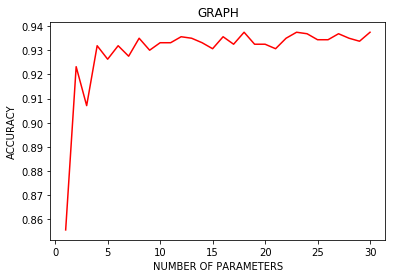

In [43]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingClassifier)
Y=np.array(accuracy_BaggingClassifier)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('ACCURACY')
plt.title('GRAPH')
plt.show()
print("MAX ACCURACY==",max_acc,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

# XGB CLASSIFIER #

In [46]:
#load data
train_data=pd.read_csv("DATA/CreditTraining.csv")

#preprocessing Data
train_data_preprocessing, Y_train_data_preprocessing=Feature_Engineering(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_xgb=[]
parameter_xgb=[]

#for obtain the best caracteristique
max_acc=0.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(100):
    parameter_xgb.append(i+1)
    xgb_clf = XGBClassifier(n_estimators=i+1)
    #training the xgb model
    xgb_clf.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)
    #testing model
    prediction_= xgb_clf.predict(DATA_node_test_preprocessing)
    #calculate accuracy
    acc=accuracy_score(Y_node_test_preprocessing,prediction_)
    if(acc>max_acc):
        max_acc=acc
        rate=0.02
        estimator=i+1
    accuracy_xgb.append(acc)
timer(start_time)


 Time taken: 0 hours 0 minutes and 16.89 seconds.


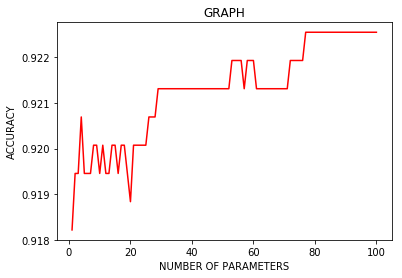

MAX ACCURACY== 0.9225526641883519     OBTAIN WITH learning_rate== 0.02      and n_estimators== 77


In [47]:
#BUILD THE GRAPH
X=np.array(parameter_xgb)
Y=np.array(accuracy_xgb)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('ACCURACY')
plt.title('GRAPH')
plt.show()
print("MAX ACCURACY==",max_acc,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

# RANDOM FOREST #

In [48]:
#load data
train_data=pd.read_csv("DATA/CreditTraining.csv")

#preprocessing Data
train_data_preprocessing, Y_train_data_preprocessing=Feature_Engineering(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_random_forest=[]
parameter_random_forest=[]

#for obtain the best caracteristique
max_acc=0.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10):
    parameter_random_forest.append(i+1)
    rfc = RandomForestClassifier(n_estimators=i+1)
    #training the random forest model
    model = rfc.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)    
    #testing model
    prediction_= rfc.predict(DATA_node_test_preprocessing)
    #calculate accuracy
    acc=accuracy_score(Y_node_test_preprocessing,prediction_)
    if(acc>max_acc):
        max_acc=acc
        rate=0.02
        estimator=i+1
    accuracy_random_forest.append(acc)
timer(start_time)


 Time taken: 0 hours 0 minutes and 0.29 seconds.


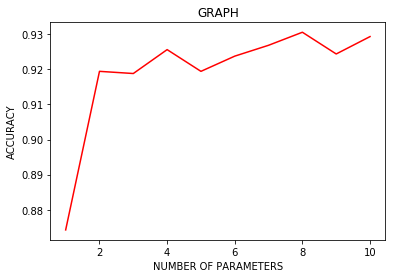

  MAX ACCURACY== 0.9306071871127634      and n_estimators== 8


In [49]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest)
Y=np.array(accuracy_random_forest)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('ACCURACY')
plt.title('GRAPH')
plt.show()
print("  MAX ACCURACY==",max_acc,"     and n_estimators==",estimator)

## K-NEAREST NEIGHBORS ALGORITHM

In [52]:
#load data
train_data=pd.read_csv("DATA/CreditTraining.csv")

#preprocessing Data
train_data_preprocessing, Y_train_data_preprocessing=Feature_Engineering(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_knn=[]
parameter_knn=[]

#for obtain the best caracteristique
max_acc=0.0
estimator=0

start_time = timer(None)
for i in range(100):
    parameter_knn.append(i+1)
    knn = KNeighborsClassifier(n_neighbors = i+1)
    #training the knn model
    model = knn.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)    
    #testing model
    prediction_= knn.predict(DATA_node_test_preprocessing)
    #calculate accuracy
    acc=accuracy_score(Y_node_test_preprocessing,prediction_)
    if(acc>max_acc):
        max_acc=acc
        estimator=i+1
    accuracy_knn.append(acc)
timer(start_time)


 Time taken: 0 hours 0 minutes and 27.79 seconds.


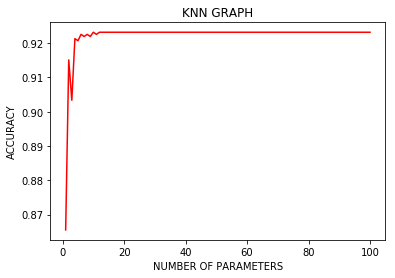

  MAX ACCURACY== 0.9231722428748451      and n_estimators== 10


In [53]:
#BUILD THE GRAPH
X=np.array(parameter_knn)
Y=np.array(accuracy_knn)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('ACCURACY')
plt.title('KNN GRAPH')
plt.show()
print("  MAX ACCURACY==",max_acc,"     and n_estimators==",estimator)

## ARTIFICIAL NEURAL NETWORK 

In [ ]:
#load data
train_data=pd.read_csv("DATA/CreditTraining.csv")

#preprocessing Data
train_data_preprocessing, Y_train_data_preprocessing=Feature_Engineering(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_ANN=[]
parameter_ANN=[]

#keras
from keras.models import Sequential
from keras.layers import Dense

#for obtain the best caracteristique
max_acc=0.0
estimator=0

Artificial_NN = Sequential()

## SUPPORT VECTOR MACHINE 

In [41]:
#load data
train_data=pd.read_csv("DATA/CreditTraining.csv")

#preprocessing Data
train_data_preprocessing, Y_train_data_preprocessing=Feature_Engineering(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_svm=[]
parameter_svm=[]


#for obtain the best caracteristique
max_acc=0.0
estimator=0



start_time = timer(None)
for i in range(3):
    parameter_svm.append(i+1)
    #svm_ = svm.SVC(kernel='rbf', gamma=(0.01)*(i+1))#Gaussian kernel
    #svm = SVC(kernel='poly', degree=i+1)#polynomial kernel
    #svm =  = SVC(kernel='linear')#linear kernel
    #training the knn model
    model = svm_.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)    
    #testing model
    prediction_= svm_.predict(DATA_node_test_preprocessing)
    #calculate accuracy
    acc=accuracy_score(Y_node_test_preprocessing,prediction_)
    if(acc>max_acc):
        max_acc=acc
        estimator=i+1
    accuracy_svm.append(acc)
timer(start_time)


 Time taken: 0 hours 0 minutes and 3.55 seconds.


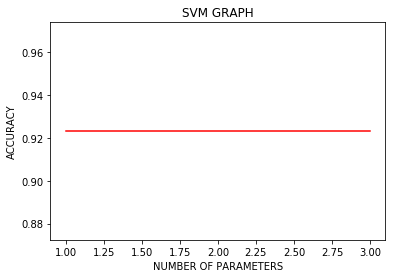

  MAX ACCURACY== 0.9231722428748451      and n_estimators== 1


In [42]:
#BUILD THE GRAPH
X=np.array(parameter_svm)
Y=np.array(accuracy_svm)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('ACCURACY')
plt.title('SVM GRAPH')
plt.show()
print("  MAX ACCURACY==",max_acc,"     and n_estimators==",estimator)

## CROSS-VALIDATION KNN

In [84]:
#load data
train_data=pd.read_csv("DATA/CreditTraining.csv")

#preprocessing Data
train_data_preprocessing, Y_train_data_preprocessing=Feature_Engineering(train_data)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_knn_fold=[]
parameter_knn_fold=[]

#for obtain the best caracteristique
max_acc=0.0
estimator=0

start_time = timer(None)
for i in range(900,901):
    parameter_knn_fold.append(i+1)
    #create knn model
    knn_fold = KNeighborsClassifier(n_neighbors = i+1)
    #cross validation model
    knn_fold_scores = cross_val_score(knn_fold, train_data_preprocessing, Y_train_data_preprocessing, cv=200, scoring='accuracy')
    #calculate accuracy
    acc=knn_fold_scores.max()
    if(acc>max_acc):
        max_acc=acc
        estimator=i+1
    accuracy_knn_fold.append(acc)
timer(start_time)


 Time taken: 0 hours 0 minutes and 9.94 seconds.


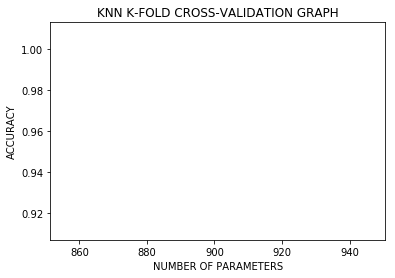

  MAX ACCURACY== 0.96      and n_estimators== 901


In [85]:
#BUILD THE GRAPH
X=np.array(parameter_knn_fold)
Y=np.array(accuracy_knn_fold)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('ACCURACY')
plt.title('KNN K-FOLD CROSS-VALIDATION GRAPH')
plt.show()
print("  MAX ACCURACY==",max_acc,"     and n_estimators==",estimator)

# CROSS VALIDATION WITH XGB CLASSIFIER #

In [86]:
#load data
train_data=pd.read_csv("DATA/CreditTraining.csv")

#preprocessing Data
train_data_preprocessing, Y_train_data_preprocessing=Feature_Engineering(train_data)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_xgb_cross=[]
parameter_xgb_cross=[]

#for obtain the best caracteristique
max_acc=0.0
estimator=0

start_time = timer(None)
for i in range(900,901):
    parameter_xgb_cross.append(i+1)
    #create knn model
    xgb_cross = XGBClassifier(n_estimators=i+1)
    #cross validation model
    xgb_cross_scores = cross_val_score(xgb_cross, train_data_preprocessing, Y_train_data_preprocessing, cv=200, scoring='accuracy')
    #calculate accuracy
    acc=xgb_cross_scores.max()
    if(acc>max_acc):
        max_acc=acc
        estimator=i+1
    accuracy_xgb_cross.append(acc)
timer(start_time)


 Time taken: 0 hours 12 minutes and 52.16 seconds.


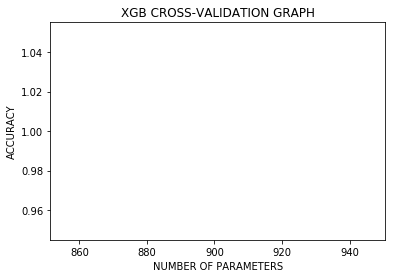

  MAX ACCURACY== 1.0      and n_estimators== 901


In [87]:
#BUILD THE GRAPH
X=np.array(parameter_xgb_cross)
Y=np.array(accuracy_xgb_cross)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('ACCURACY')
plt.title('XGB CROSS-VALIDATION GRAPH')
plt.show()
print("  MAX ACCURACY==",max_acc,"     and n_estimators==",estimator)

# CROSS VALIDATION WITH RANDOM FOREST #

In [88]:
#load data
train_data=pd.read_csv("DATA/CreditTraining.csv")

#preprocessing Data
train_data_preprocessing, Y_train_data_preprocessing=Feature_Engineering(train_data)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_rfc_cross=[]
parameter_rfc_cross=[]

#for obtain the best caracteristique
max_acc=0.0
estimator=0

start_time = timer(None)
for i in range(900,901):
    parameter_rfc_cross.append(i+1)
    #create knn model
    rfc_cross = XGBClassifier(n_estimators=i+1)
    #cross validation model
    rfc_cross_scores = cross_val_score(rfc_cross, train_data_preprocessing, Y_train_data_preprocessing, cv=200, scoring='accuracy')
    #calculate accuracy
    acc=rfc_cross_scores.max()
    if(acc>max_acc):
        max_acc=acc
        estimator=i+1
    accuracy_rfc_cross.append(acc)
timer(start_time)


 Time taken: 0 hours 13 minutes and 0.87 seconds.


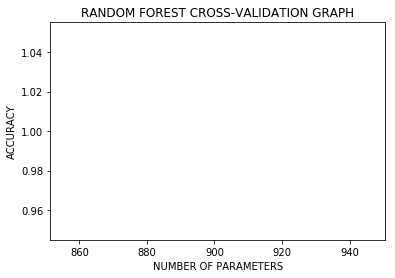

  MAX ACCURACY== 1.0      and n_estimators== 901


In [89]:
#BUILD THE GRAPH
X=np.array(parameter_rfc_cross)
Y=np.array(accuracy_rfc_cross)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('ACCURACY')
plt.title('RANDOM FOREST CROSS-VALIDATION GRAPH')
plt.show()
print("  MAX ACCURACY==",max_acc,"     and n_estimators==",estimator)